In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Prodigy\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].unique()[:5]} ...")  

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician'] ...
marital: ['married' 'single' 'divorced' 'unknown'] ...
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'] ...
default: ['no' 'unknown' 'yes'] ...
housing: ['no' 'yes' 'unknown'] ...
loan: ['no' 'yes' 'unknown'] ...
contact: ['telephone' 'cellular'] ...
month: ['may' 'jun' 'jul' 'aug' 'oct'] ...
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri'] ...
poutcome: ['nonexistent' 'failure' 'success'] ...
y: ['no' 'yes'] ...


In [4]:
X = df.drop("y", axis=1)
y = df["y"].map({"yes":1, "no":0})  

In [5]:
num_cols = X.select_dtypes(exclude='object').columns
cat_cols = X.select_dtypes(include='object').columns
print("Numerical columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))

Numerical columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat_cols),
        ("num", "passthrough", num_cols)
    ]
)
model_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced'))
])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
model_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessing', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transform

In [9]:
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.8404371584699454
Test Accuracy: 0.8353569694026226


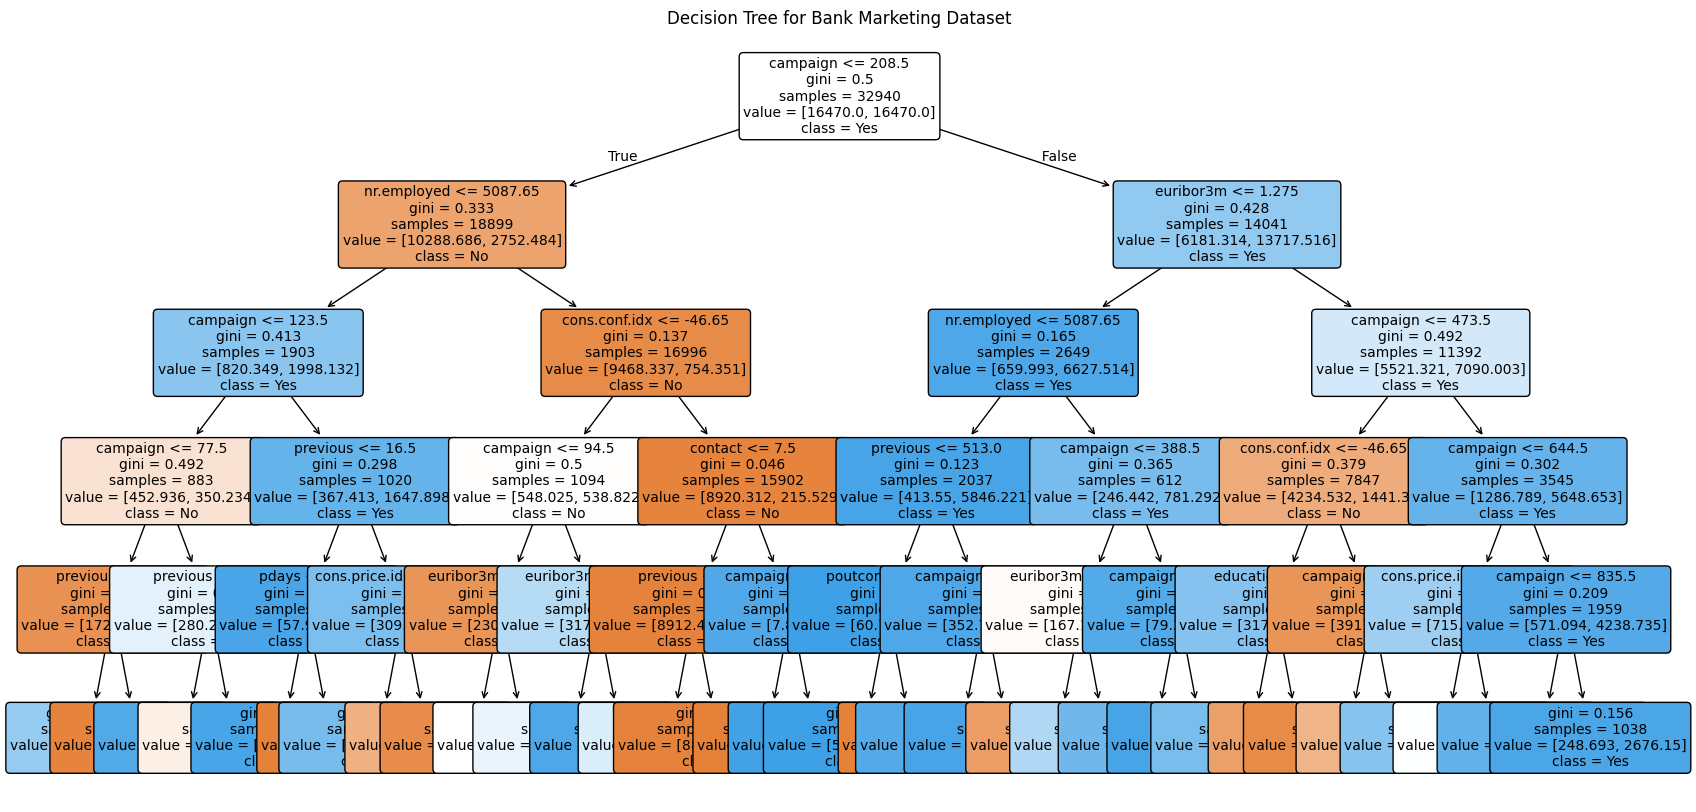

In [10]:
from sklearn.tree import plot_tree
clf = model_pipeline.named_steps['classifier']
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Bank Marketing Dataset")
plt.show()

In [11]:
y_pred = model_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8353569694026226

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      7265
           1       0.41      0.91      0.57       971

    accuracy                           0.84      8236
   macro avg       0.70      0.87      0.73      8236
weighted avg       0.92      0.84      0.86      8236



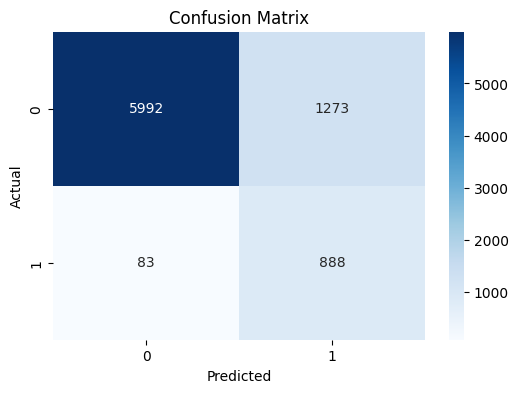

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

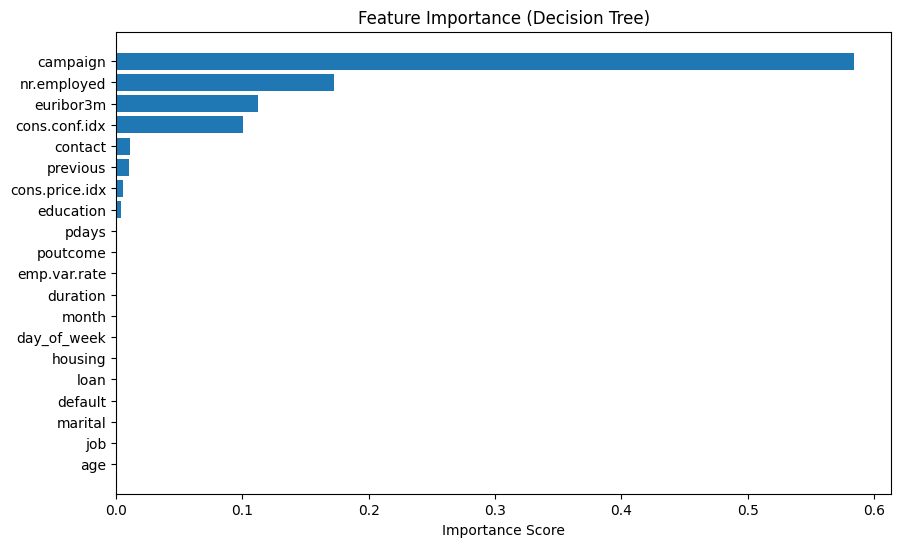

In [13]:
importance = model_pipeline.named_steps['classifier'].feature_importances_
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=True)

plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()

In [16]:
new_customer_india = pd.DataFrame([{
    "age": 30,
    "job": "manager",           
    "marital": "married",
    "education": "tertiary",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "mar",
    "day_of_week": "wed",
    "duration": 180,
    "campaign": 2,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "emp.var.rate": 1.4,
    "cons.price.idx": 94.0,
    "cons.conf.idx": -37.0,
    "euribor3m": 4.5,
    "nr.employed": 5200
}])
result = model_pipeline.predict(new_customer_india)
print("Prediction:", "Will Purchase" if result[0]==1 else "Will Not Purchase")

Prediction: Will Not Purchase


In [17]:
new_customer_yes = pd.DataFrame([{
    "age": 28,
    "job": "technician",         
    "marital": "married",
    "education": "tertiary",     
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "may",
    "day_of_week": "thu",
    "duration": 350,            
    "campaign": 1,
    "pdays": 999,
    "previous": 0,
    "poutcome": "nonexistent",
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191
}])
result = model_pipeline.predict(new_customer_yes)
print("Prediction:", "Will Purchase" if result[0]==1 else "Will Not Purchase")

Prediction: Will Not Purchase


In [18]:
new_customer_yes = pd.DataFrame([{
    "age": 35,
    "job": "admin.",           
    "marital": "married",
    "education": "tertiary",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "may",
    "day_of_week": "wed",
    "duration": 550,           
    "campaign": 1,
    "pdays": 999,
    "previous": 1,             
    "poutcome": "success",     
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191
}])
result = model_pipeline.predict(new_customer_yes)
print("Prediction:", "Will Purchase" if result[0]==1 else "Will Not Purchase")

Prediction: Will Purchase


In [19]:
new_customer_yes = pd.DataFrame([{
    "age": 40,
    "job": "admin.",           
    "marital": "married",
    "education": "tertiary",
    "default": "no",
    "housing": "yes",
    "loan": "no",
    "contact": "cellular",
    "month": "may",
    "day_of_week": "thu",
    "duration": 600,          
    "campaign": 1,
    "pdays": 999,
    "previous": 1,            
    "poutcome": "success",     
    "emp.var.rate": 1.1,
    "cons.price.idx": 93.994,
    "cons.conf.idx": -36.4,
    "euribor3m": 4.857,
    "nr.employed": 5191
}])
result = model_pipeline.predict(new_customer_yes)
print("Prediction:", "Will Purchase" if result[0]==1 else "Will Not Purchase")

Prediction: Will Purchase


In [24]:
import pandas as pd

# Combine all 4 customers into one DataFrame
customers = pd.concat([
    pd.DataFrame([{
        "Customer": "Customer 1",
        "age": 30, "job": "manager", "marital": "married", "education": "tertiary",
        "default": "no", "housing": "yes", "loan": "no", "contact": "cellular",
        "month": "mar", "day_of_week": "wed", "duration": 180, "campaign": 2,
        "pdays": 999, "previous": 0, "poutcome": "nonexistent",
        "emp.var.rate": 1.4, "cons.price.idx": 94.0, "cons.conf.idx": -37.0,
        "euribor3m": 4.5, "nr.employed": 5200,
        "Prediction": "Will Not Purchase"
    }]),
    pd.DataFrame([{
        "Customer": "Customer 2",
        "age": 28, "job": "technician", "marital": "married", "education": "tertiary",
        "default": "no", "housing": "yes", "loan": "no", "contact": "cellular",
        "month": "may", "day_of_week": "thu", "duration": 350, "campaign": 1,
        "pdays": 999, "previous": 0, "poutcome": "nonexistent",
        "emp.var.rate": 1.1, "cons.price.idx": 93.994, "cons.conf.idx": -36.4,
        "euribor3m": 4.857, "nr.employed": 5191,
        "Prediction": "Will Not Purchase"
    }]),
    pd.DataFrame([{
        "Customer": "Customer 3",
        "age": 35, "job": "admin.", "marital": "married", "education": "tertiary",
        "default": "no", "housing": "yes", "loan": "no", "contact": "cellular",
        "month": "may", "day_of_week": "wed", "duration": 550, "campaign": 1,
        "pdays": 999, "previous": 1, "poutcome": "success",
        "emp.var.rate": 1.1, "cons.price.idx": 93.994, "cons.conf.idx": -36.4,
        "euribor3m": 4.857, "nr.employed": 5191,
        "Prediction": "Will Purchase"
    }]),
    pd.DataFrame([{
        "Customer": "Customer 4",
        "age": 40, "job": "admin.", "marital": "married", "education": "tertiary",
        "default": "no", "housing": "yes", "loan": "no", "contact": "cellular",
        "month": "may", "day_of_week": "thu", "duration": 600, "campaign": 1,
        "pdays": 999, "previous": 1, "poutcome": "success",
        "emp.var.rate": 1.1, "cons.price.idx": 93.994, "cons.conf.idx": -36.4,
        "euribor3m": 4.857, "nr.employed": 5191,
        "Prediction": "Will Purchase"
    }])
], ignore_index=True)

# Display the table
customers[["Customer", "Prediction"]]


,Customer,Prediction
0,Customer 1,Will Not Purchase
1,Customer 2,Will Not Purchase
2,Customer 3,Will Purchase
3,Customer 4,Will Purchase
